In [1]:
import polars as pl

In [2]:
data = {'name': ['Sarah', 'Mike', 'Bob', 'Ashley']}
lf = pl.LazyFrame(data)
type(lf)

polars.lazyframe.frame.LazyFrame

In [3]:
lf.collect().head()

name
str
"""Sarah"""
"""Mike"""
"""Bob"""
"""Ashley"""


In [4]:
lf =pl.scan_csv('/Users/grojas/Documents/ProjectsPycharm/data/cookpolars/data/titanic_dataset.csv')
lf.head().collect()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [5]:
df = pl.read_csv('/Users/grojas/Documents/ProjectsPycharm/data/cookpolars/data/titanic_dataset.csv')
df.lazy().head(3).collect()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [6]:
lf.collect_schema()

Schema([('PassengerId', Int64),
        ('Survived', Int64),
        ('Pclass', Int64),
        ('Name', String),
        ('Sex', String),
        ('Age', Float64),
        ('SibSp', Int64),
        ('Parch', Int64),
        ('Ticket', String),
        ('Fare', Float64),
        ('Cabin', String),
        ('Embarked', String)])

In [7]:
lf.collect_schema().len()

12

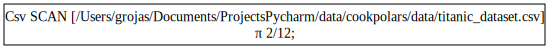

In [8]:
(lf
 .select(pl.col('Name', 'Age'))
 .show_graph())

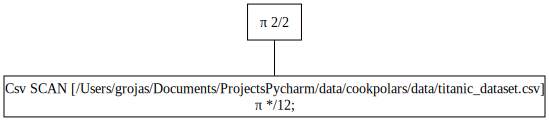

In [9]:
(lf
 .select(pl.col('Name', 'Age'))
 .show_graph(optimized=False))

In [10]:
(lf
 .select(pl.col('Name', 'Age'))
 .explain())

'Csv SCAN [/Users/grojas/Documents/ProjectsPycharm/data/cookpolars/data/titanic_dataset.csv]\nPROJECT 2/12 COLUMNS'

In [14]:
result=(lf
 .select(pl.col('Name', 'Age'))
 .explain())

In [15]:
print(result,sep='\n')

Csv SCAN [/Users/grojas/Documents/ProjectsPycharm/data/cookpolars/data/titanic_dataset.csv]
PROJECT 2/12 COLUMNS
